# Chapter 8: Forecasting

## 8.3 Moving Average

### 8.3.1 Loading and visualizing the time series dataset

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

ogauge = pd.read_excel(r'C:\Users\Ronny\Desktop\Project_2022\Ogauge_testing\Ranging19_5bar.xls')
ogauge.head()

,Time,PRESSURE
0,12:30:17,5.004
1,12:30:18,5.009
2,12:30:19,5.011
3,12:30:20,5.012
4,12:30:21,5.015


In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

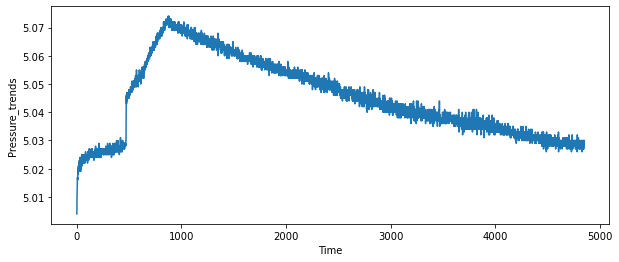

In [6]:
plt.figure( figsize=(10,4))
plt.xlabel( "Time" )
plt.ylabel( "Pressure_trends" )
plt.plot( ogauge['PRESSURE'] );

In [7]:
ogauge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      4849 non-null   object 
 1   PRESSURE  4849 non-null   float64
dtypes: float64(1), object(1)
memory usage: 75.9+ KB


### 8.3.2  Forecasting using Moving Average

In [8]:
ogauge['mavg_12'] = ogauge['PRESSURE'].rolling( window = 12 ).mean().shift(1)

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
ogauge[['PRESSURE', 'mavg_12']][0:]

,PRESSURE,mavg_12
0,5.00,NaN
1,5.01,NaN
2,5.01,NaN
3,5.01,NaN
4,5.01,NaN
...,...,...
4844,5.03,5.03
4845,5.03,5.03
4846,5.03,5.03
4847,5.03,5.03


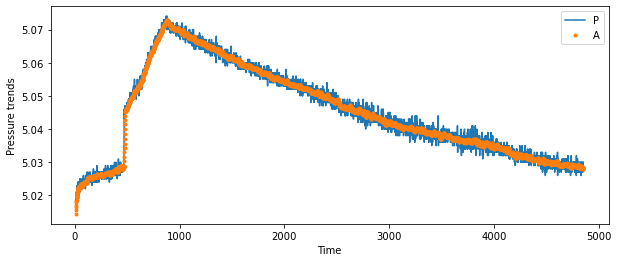

In [10]:
plt.figure( figsize=(10,4))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][12:] );
plt.plot( ogauge['mavg_12'][12:], '.' );
plt.legend('PA');

### 8.3.3  Calculating forecast accuracy

#### 8.3.3.2 Root mean square error

In [11]:
import numpy as np

def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [12]:
get_mape( ogauge['PRESSURE'][36:].values, 
          ogauge['mavg_12'][36:].values)

0.02

In [13]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error( ogauge['PRESSURE'][36:].values, 
                            ogauge['mavg_12'][36:].values))

0.0013939371398384935

### 8.3.4 Exponential Smoothing

In [14]:
ogauge['ewm'] = ogauge['PRESSURE'].ewm( alpha = 0.2 ).mean()

In [15]:
pd.options.display.float_format = '{:.2f}'.format

In [16]:
ogauge[36:]

,Time,PRESSURE,mavg_12,ewm
36,12:30:53,5.02,5.02,5.02
37,12:30:54,5.02,5.02,5.02
38,12:30:55,5.02,5.02,5.02
39,12:30:56,5.02,5.02,5.02
40,12:30:57,5.02,5.02,5.02
...,...,...,...,...
4844,13:59:56,5.03,5.03,5.03
4845,13:59:57,5.03,5.03,5.03
4846,13:59:58,5.03,5.03,5.03
4847,13:59:59,5.03,5.03,5.03


In [17]:
get_mape( ogauge[['PRESSURE']][36:].values, 
          ogauge[['ewm']][36:].values)

0.02

No handles with labels found to put in legend.


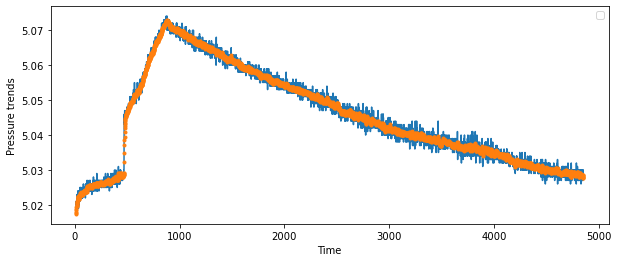

In [18]:
plt.figure( figsize=(10,4))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][12:] );
plt.plot( ogauge['ewm'][12:], '.' );
plt.legend();

## 8.4 Decomposing Time Series

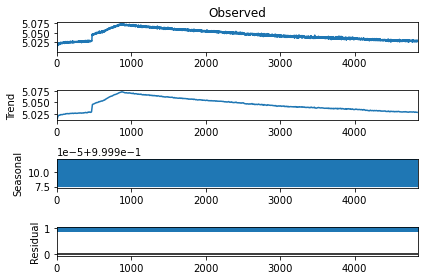

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompse = seasonal_decompose( np.array(ogauge['PRESSURE']), 
                                  model='multiplicative',   
                                 freq = 12 )

## Plotting the deocompsed time series components
ts_plot = ts_decompse.plot()

In [20]:
ogauge['seasonal'] = ts_decompse.seasonal
ogauge['trend'] = ts_decompse.trend

## 8.5 Auto Regressive Integrated Moving Average Models (ARIMA)

### 8.5.1 Auto Regression (AR) Models

In [21]:
ogauge.head(-5)

,Time,PRESSURE,mavg_12,ewm,seasonal,trend
0,12:30:17,5.00,NaN,5.00,1.00,NaN
1,12:30:18,5.01,NaN,5.01,1.00,NaN
2,12:30:19,5.01,NaN,5.01,1.00,NaN
3,12:30:20,5.01,NaN,5.01,1.00,NaN
4,12:30:21,5.01,NaN,5.01,1.00,NaN
...,...,...,...,...,...,...
4839,13:59:51,5.03,5.03,5.03,1.00,5.03
4840,13:59:52,5.03,5.03,5.03,1.00,5.03
4841,13:59:53,5.03,5.03,5.03,1.00,5.03
4842,13:59:54,5.03,5.03,5.03,1.00,5.03


In [22]:
ogauge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      4849 non-null   object 
 1   PRESSURE  4849 non-null   float64
 2   mavg_12   4837 non-null   float64
 3   ewm       4849 non-null   float64
 4   seasonal  4849 non-null   float64
 5   trend     4837 non-null   float64
dtypes: float64(5), object(1)
memory usage: 227.4+ KB


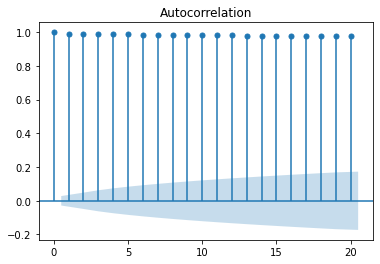

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Show autocorrelation upto lag 10
acf_plot = plot_acf( ogauge.PRESSURE, 
                     lags=20)

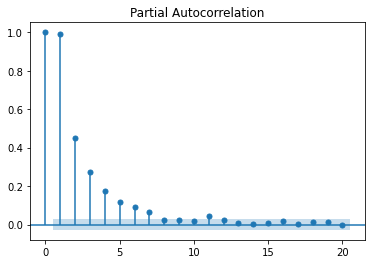

In [24]:
pacf_plot = plot_pacf( ogauge.PRESSURE, 
                      lags=20 )

#### Building AR Model

In [25]:
from statsmodels.tsa.arima_model import ARIMA 

In [26]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
#model = ARIMA(ogauge.PRESSURE, order=(1,1,2))
#ar_model = model.fit(disp=0)
#print(ar_model.summary())

arima = ARIMA( ogauge.PRESSURE[0:3000].astype(np.float64), order = (1,0,0))
ar_model = arima.fit()

In [27]:
#model = ARIMA(ogauge.PRESSURE, order=(1,1,1))
#model_fit = model.fit(disp=0)
print(ar_model.summary())

                              ARMA Model Results                              
Dep. Variable:               PRESSURE   No. Observations:                 3000
Model:                     ARMA(1, 0)   Log Likelihood               14871.132
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 01 Jan 2022   AIC                         -29736.265
Time:                        16:45:51   BIC                         -29718.246
Sample:                             0   HQIC                        -29729.783
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.0486      0.005   1026.476      0.000       5.039       5.058
ar.L1.PRESSURE     0.9939      0.002    453.839      0.000       0.990       0.998
                                    

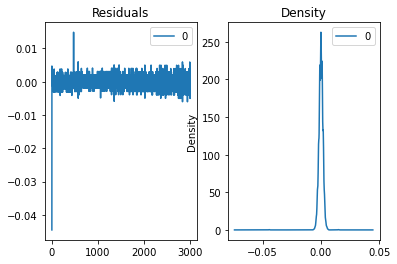

In [28]:
residuals = pd.DataFrame(ar_model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [29]:
model_fit.plot_predict(dynamic=False)
plt.show()

NameError: name 'model_fit' is not defined

In [ ]:
forecast_31_37 = ar_model.predict(3000,3100)
forecast_31_37

# NEW MODEL

In [30]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = ogauge.PRESSURE[:2500]
test = ogauge.PRESSURE[2500:]

In [31]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 

In [32]:
fc, se, conf = fitted.forecast(715, alpha=0.05)

In [33]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

ValueError: Length of passed values is 715, index implies 2349.

NameError: name 'fc_series' is not defined

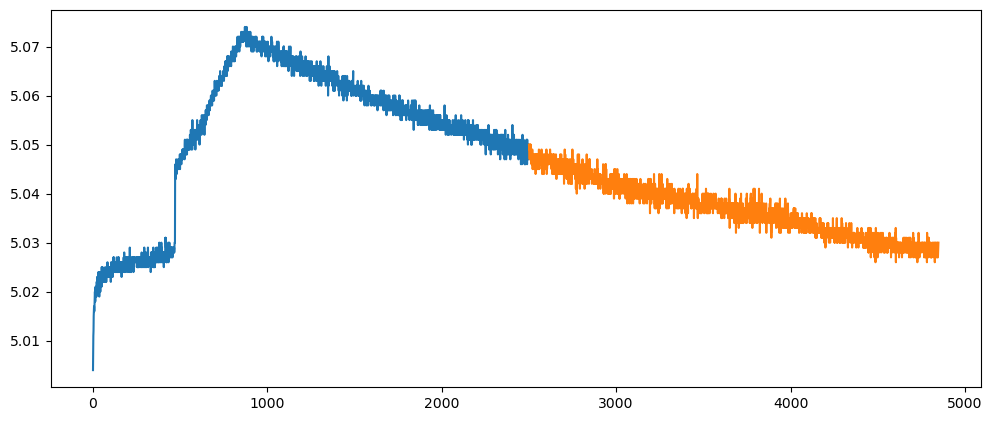

In [34]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

ValueError: operands could not be broadcast together with shapes (715,) (2349,) 

In [36]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='red', label='Original')
    mean = plt.plot(movingAverage, color='green', label='Rolling Mean')
    std = plt.plot(movingSTD, color='brown', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure( figsize=(15,7))

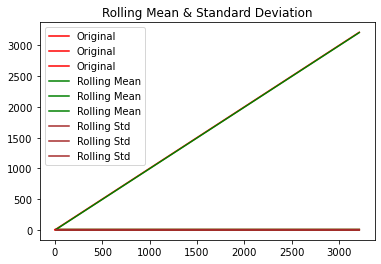

<Figure size 1080x504 with 0 Axes>

In [42]:
test_stationarity(ogauge)